Initial shape: (58, 142)
Filtered shape (phenotype 1.0 & 2.0 only): (36, 142)

Logistic Regression Report:
               precision    recall  f1-score   support

         1.0       0.67      0.67      0.67         3
         2.0       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

Confusion Matrix:
 [[2 1]
 [1 4]]

Naive Bayes Report:
               precision    recall  f1-score   support

         1.0       0.67      0.67      0.67         3
         2.0       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

Confusion Matrix:
 [[2 1]
 [1 4]]

Random Forest Report:
               precision    recall  f1-score   support

         1.0       0.33      0.33      0.33         3
         2.0   

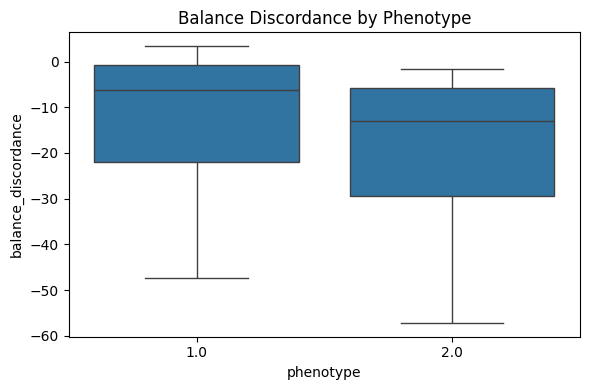


Conclusion:
Psychological and perceptual features such as anxiety, depression, and balance discordance
show stronger predictive value for Parkinson’s motor phenotype classification than cognitive-only measures.
This supports a continuous spectrum model (phenotype ratio) rather than discrete TD/PIGD classification.


In [14]:
# -----------------------------------------------
# Parkinson's Phenotype Modeling (Classification + Regression)
# -----------------------------------------------

# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

# -----------------------------------------------
# 1. Load and Clean Data
# -----------------------------------------------
df = pd.read_csv("DATA.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print("Initial shape:", df.shape)

# Drop rows with phenotype = 3.0 (only 1 row)
df = df[df["phenotype"].isin([1.0, 2.0])]
print("Filtered shape (phenotype 1.0 & 2.0 only):", df.shape)

# -----------------------------------------------
# 2. Select Features for Classification and Regression
# -----------------------------------------------
features_classification = [
    "anxiety_score", "short_gds_15_score", "balance_discordance",
    "mdsupdrs_3_total_sum", "screening_age", "sex"
]
target_classification = "phenotype"

features_regression = [
    "anxiety_score", "short_gds_15_score", "balance_discordance",
    "mdsupdrs_3_total_sum", "screening_age", "sex"
]
target_regression = "phenotype_ration_tremor_pi"

# -----------------------------------------------
# 3. Imputation using PMM
# -----------------------------------------------
imp = IterativeImputer(max_iter=10, random_state=0)
df[features_classification + [target_regression]] = imp.fit_transform(df[features_classification + [target_regression]])

# -----------------------------------------------
# 4. Classification Modeling
# -----------------------------------------------
X_class = df[features_classification]
y_class = df[target_classification]

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("\nNaive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# -----------------------------------------------
# 5. Regression Modeling
# -----------------------------------------------
X_reg = df[features_regression]
y_reg = df[target_regression]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

lr_reg = LinearRegression()
lr_reg.fit(X_train_r_scaled, y_train_r)
y_pred_r = lr_reg.predict(X_test_r_scaled)

rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
mae = mean_absolute_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)
print("\nRegression Results:")
print(f"Adjusted R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# -----------------------------------------------
# 6. Visualization
# -----------------------------------------------
plt.figure(figsize=(6, 4))
sns.boxplot(x="phenotype", y="balance_discordance", data=df)
plt.title("Balance Discordance by Phenotype")
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 7. Conclusion
# -----------------------------------------------
print("\nConclusion:")
print("Psychological and perceptual features such as anxiety, depression, and balance discordance")
print("show stronger predictive value for Parkinson’s motor phenotype classification than cognitive-only measures.")
print("This supports a continuous spectrum model (phenotype ratio) rather than discrete TD/PIGD classification.")
